# Customer Analysis for Retail

**A Retail store is required to analyze the day-to-day transactions and keep a track of its customers
spread across various locations along with their purchases/returns across various categories.**

# **Step 1: Loading the Necessary Libraries** 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


# **Step 2: Loading the Datasets**

In [2]:
#Loading Customer dataset
cust=pd.read_csv('E:/Yash/AnalytixLabs/Python/Assignments/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
display(cust.head())

#Loading prod_cat_info dataset
prod=pd.read_csv('E:/Yash/AnalytixLabs/Python/Assignments/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
display(prod.head())

#Loading Transactions dataset
tran=pd.read_csv('E:/Yash/AnalytixLabs/Python/Assignments/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')
display(tran.head())

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop



# **Step 3: Understanding the dataset**

In [3]:
#Understanding the dataset Customer
display(cust.info())
display(cust.shape)

#Understanding the dataset prod_cat_info
display(prod.info())
display(prod.shape)

#Understanding the dataset Transactions
display(tran.info())
display(tran.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


None

(5647, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


None

(23, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


None

(23053, 10)

*Now that we have imported the necessary libraries and data and understand the data our next step would be to clean the data a bit to get it into right format before we start analysing and answering the questions*


**Question 1: Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.**

In [4]:
#Merging datasets transactions and customers
m1=pd.merge(left=tran,right=cust,left_on='cust_id',right_on='customer_Id',how='left')

#Merging combination of transactions and customers with the dataset prod_cat_info
Customer_Final=pd.merge(left=m1,right=prod,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='left')

#Removing redundant columns
Customer_Final=Customer_Final.drop(['prod_sub_cat_code', 'customer_Id'], axis=1)

#Displaying Final dataset Customer_Final
display(Customer_Final.head())
display(Customer_Final.shape)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY


(23053, 15)

**Question 2: Prepare a summary report for the merged data set.<br>
 a. Get the column names and their corresponding data types<br>
 b. Top/Bottom 10 observations<br>
 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)**

In [5]:
#Converting columns to relevant datatypes for futher categorizing them as categorical and continuous
Customer_Final.prod_cat_code=Customer_Final.prod_cat_code.astype('object')
Customer_Final.prod_subcat_code=Customer_Final.prod_subcat_code.astype('object')
Customer_Final.city_code=Customer_Final.city_code.astype('object')
Customer_Final.cust_id=Customer_Final.cust_id.astype('object')
Customer_Final.transaction_id=Customer_Final.transaction_id.astype('object')
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date)

#a. Get the column names and their corresponding data types
display(Customer_Final.info())

#b. Top/Bottom 10 observations
display(Customer_Final.head(10))
display(Customer_Final.tail(10))

#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
display(Customer_Final.describe())


#d. Frequency tables for all the categorical variables
display(Customer_Final.loc[:,Customer_Final.dtypes=="object"].describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  object        
 1   cust_id           23053 non-null  object        
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  object        
 4   prod_cat_code     23053 non-null  object        
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  object        
 11  Gender            23044 non-null  object        
 12  city_code         23045 non-null  object        
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

None

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,09-10-1982,F,6,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,29-05-1981,M,9,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,21-04-1971,M,9,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,04-11-1971,F,8,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,27-11-1979,F,3,Electronics,Personal Appliances


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,10-08-1976,M,8,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,12-10-1991,M,4,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,17-01-1980,F,8,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,28-06-1975,F,6,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,18-04-1974,M,4,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,21-02-1972,M,7,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,20-06-1976,M,8,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,22-05-1970,M,2,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,15-01-1982,M,1,Books,Children


,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
count,23053,23053,23053,23053,23053,23053,23044,23045.0,23053,23053
unique,20878,5506,12,6,4,3987,2,10.0,6,18
top,426787191,268819,4,5,e-Shop,27-12-1988,M,4.0,Books,Women
freq,4,13,4002,6069,9311,32,11811,2422.0,6069,3048


**Question 3: Generate histograms for all continuous variables and frequency bars for categorical variables.**


**a.) Generating Histogram for all Continuous Variables**

**Note: Qty,Rate,Tax,total_amt are continuous variables**

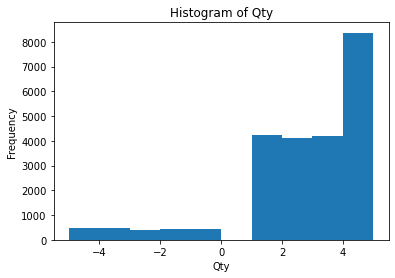

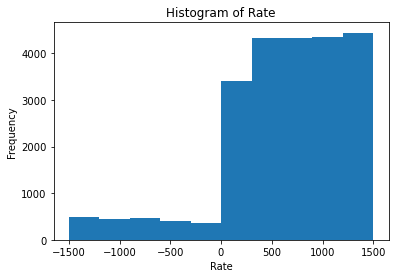

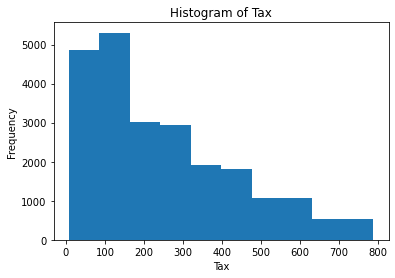

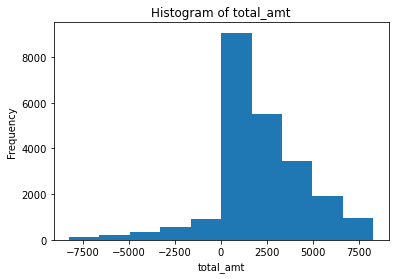

In [6]:
for i in Customer_Final.columns:
    if((Customer_Final.dtypes[i]=='int64') or (Customer_Final.dtypes[i]=='float64') ):
        plt.hist(Customer_Final[i])
        plt.title('Histogram of '+i)
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()

**b.) Generating Frequency Bars for all Categorical Variables**

*Note: Gender,Product Category, Product Sub Category,City Code, Store Type are considered as Categorical variables*

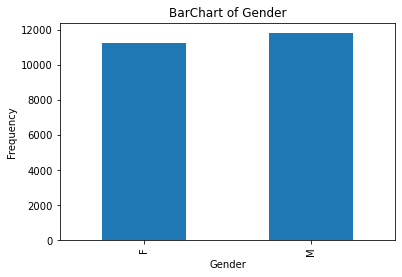

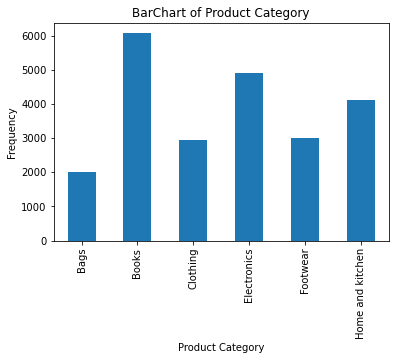

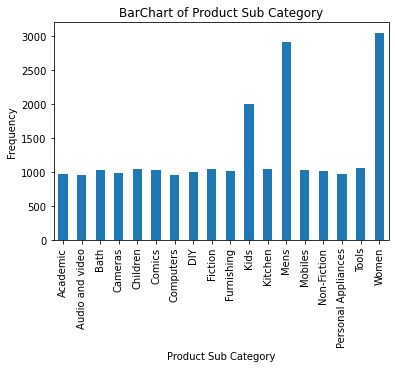

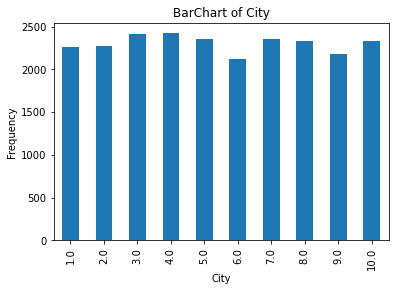

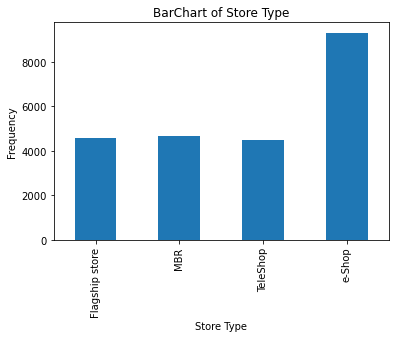

In [7]:
#Gender Barplot
res1=Customer_Final.groupby(by='Gender')['cust_id'].count()
res1.plot(kind='bar',legend=False)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('BarChart of Gender')
plt.show()

#Product Category Barplot
res1=Customer_Final.groupby(by='prod_cat')['cust_id'].count()
res1.plot(kind='bar',legend=False)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('BarChart of Product Category')
plt.show()

#Product Sub Category Barplot
res1=Customer_Final.groupby(by='prod_subcat')['cust_id'].count()
res1.plot(kind='bar',legend=False)
plt.xlabel('Product Sub Category')
plt.ylabel('Frequency')
plt.title('BarChart of Product Sub Category')
plt.show()

#City_code Barplot
res1=Customer_Final.groupby(by='city_code')['cust_id'].count()
res1.plot(kind='bar',legend=False)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('BarChart of City')
plt.show()

#Store_type Barplot
res1=Customer_Final.groupby(by='Store_type')['cust_id'].count()
res1.plot(kind='bar',legend=False)
plt.xlabel('Store Type')
plt.ylabel('Frequency')
plt.title('BarChart of Store Type')
plt.show()

**Question 4: Calculate the following information using the merged dataset :<br>
 a. Time period of the available transaction data<br>
 b. Count of transactions where the total amount of transaction was negative**

In [8]:
#Time Period of availaible transaction data
min_date=Customer_Final.tran_date.min()
max_date=Customer_Final.tran_date.max()
print("Time period is from "+ pd.Timestamp.strftime(min_date,
                format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

# Count of transactions where the total amount of transaction was negative
Customer_Final.transaction_id[Customer_Final['total_amt']<0].count()

Time period is from 02-01-2011 to 02-12-2014


2177

**Question 5: Analyse which product categories are more popular among females vs male customers.**

In [9]:
gpc=pd.crosstab(Customer_Final.Gender,Customer_Final.prod_cat,values=Customer_Final['Qty'],aggfunc='sum')
gpc

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


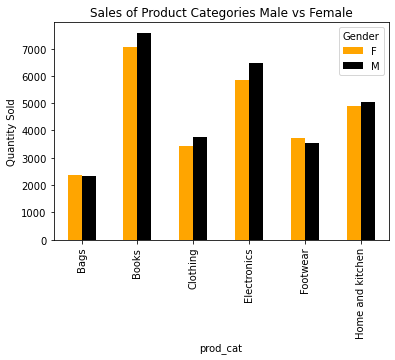

In [10]:
gpc.T.plot(kind='bar',stacked=False,color=['orange','black'])
plt.ylabel('Quantity Sold')
plt.title('Sales of Product Categories Male vs Female')
plt.show()

#Conclusion
#According to the barchart below it is seen that categories like
#Bags and Footwear are more common between females than males

**Question 6: Which City code has the maximum customers and what was the percentage of customers from
that city?**

In [11]:
Customer_Final.head()

#Which city code has maximum customers?
tc=Customer_Final.groupby(by='city_code')['cust_id'].count()
c4=Customer_Final.groupby(by='city_code')['cust_id'].count().sort_values(ascending=False).head(1)
print(c4)
#City with city_code has maximum customers

#Percentage of customers from City which has max customers?
p=round((c4.sum()/tc.sum()*100),2)
print(" ")
print("The Percentage of Customers from city_code 4")
print(p)

city_code
4.0    2422
Name: cust_id, dtype: int64
 
The Percentage of Customers from city_code 4
10.51


**Question 7: Which store type sells the maximum products by value and by quantity?**


In [12]:
Customer_Final.groupby(by='Store_type')['Rate','Qty'].sum().sort_values(by=['Rate','Qty'],ascending=False).head(1)

<ipython-input-12-71dda416d72d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby(by='Store_type')['Rate','Qty'].sum().sort_values(by=['Rate','Qty'],ascending=False).head(1)


,Rate,Qty
Store_type,,
e-Shop,5941001,22763


**Question 8:What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?**

In [13]:
fec=Customer_Final[Customer_Final.Store_type=="Flagship store"].groupby(by='prod_cat')['total_amt'].sum()
print("The total amount earned from the Electronics and Clothing categories from Flagship Stores ",round(fec.loc[('Electronics','Clothing'),].sum(),2))


The total amount earned from the Electronics and Clothing categories from Flagship Stores  3409559.27


**Question 9: What was the total amount earned from "Male" customers under the "Electronics" category?**

In [14]:
male_elec=Customer_Final[Customer_Final.prod_cat=='Electronics'].groupby(by='Gender')['total_amt'].sum()
print("The total amount earned from male customers under Electronics category is: ",round(male_elec.loc[('M'),],2))

The total amount earned from male customers under Electronics category is:  5703109.43


**Question 10: How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?**

In [15]:
pos_tran=Customer_Final[Customer_Final.total_amt<0]
cus_grp=pos_tran.groupby(by='cust_id')['transaction_id'].count().sort_values(ascending=False)
cus_grp

#We can see here no individual customer has greater than 10 transactions

cust_id
270308    4
268207    4
268663    4
267939    4
274767    4
         ..
271187    1
271190    1
271195    1
271198    1
266783    1
Name: transaction_id, Length: 1728, dtype: int64

**Question 11: For all customers aged between 25 - 35, find out:<br>
 a. What was the total amount spent for “Electronics” and “Books” product categories?<br>
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**


In [16]:
#Inserting age column
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%Y')    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')
Customer_Final.head()
age_range=Customer_Final[((Customer_Final.AGE>=25.0) & (Customer_Final.AGE<=35.0))]
age_range.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,AGE
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,1992-07-27,M,8,Books,DIY,28.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,1992-07-27,M,8,Books,DIY,28.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.40,4508.40,e-Shop,1986-10-13,M,1,Home and kitchen,Tools,33.0
23,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,1989-08-17,M,10,Footwear,Mens,31.0
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.20,-265.20,MBR,1992-01-02,F,6,Bags,Women,28.0


**a. What was the total amount spent for “Electronics” and “Books” product categories?**

In [17]:
elec_books=age_range.groupby(by='prod_cat')['total_amt'].sum()
print('The total amount spent for “Electronics” and “Books” product categories is ',
      round(elec_books.loc[('Electronics','Books'),].sum(),2))

The total amount spent for “Electronics” and “Books” product categories is  8386875.97


**b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**

In [18]:
jan_mar=age_range[((age_range.tran_date>='2014-01-01') & (age_range.tran_date<='2014-03-01'))]
print('The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is ',
      jan_mar.total_amt.sum())

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is  575803.345
